In [110]:
using PyPlot
using HDF5

In [149]:
begin 
    include("gaussian_field_test.jl")
end;

Test Summary:   | Pass  Total  Time
Fourier 1d test |   10     10  0.4s
Test Summary:   | Pass  Total  Time
Fourier 2d test |   12     12  0.5s


In [3]:
include("gaussian_field.jl")

run2 (generic function with 1 method)

In [94]:
params_1d = (
    L=8.,
    n=128, # Should be even
    tmax=50.,
    D=1.,
    r=1.,
    T=1.,
    k=0., # No confining potential
    A=1.,
    σ=0.25,
    saveat=0.01,
    m=2,
    X0=[0., 3.]
)

(L = 8.0, n = 128, tmax = 50.0, D = 1.0, r = 1.0, T = 1.0, k = 0.0, A = 1.0, σ = 0.25, saveat = 0.01, m = 2, X0 = [0.0, 3.0])

# Test integration

In [95]:
xx, kk = fourier_xk(params_1d.L, params_1d.n)

([0.0, 0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5, 0.5625  …  7.375, 7.4375, 7.5, 7.5625, 7.625, 7.6875, 7.75, 7.8125, 7.875, 7.9375], [0.0, 0.7853981633974483, 1.5707963267948966, 2.356194490192345, 3.141592653589793, 3.9269908169872414, 4.71238898038469, 5.497787143782138, 6.283185307179586, 7.0685834705770345  …  -7.853981633974483, -7.0685834705770345, -6.283185307179586, -5.497787143782138, -4.71238898038469, -3.9269908169872414, -3.141592653589793, -2.356194490192345, -1.5707963267948966, -0.7853981633974483])

In [96]:
@time sol = run(params_1d);

 20.302114 seconds (54.93 M allocations: 22.678 GiB, 6.93% gc time, 7.15% compilation time: 91% of which was recompilation)


In [97]:
skip = 1
tt = sol.t[1:skip:end]
trajs = [
    [s[params_1d.n+k] for s in sol.u[1:skip:end]] 
    for k=1:params_1d.m
]
phif_sol = hcat(sol.u[1:skip:end]...)[1:end-params_1d.m, :]
println(size(phif_sol))
    phi_sol = hcat([custom_irfft(s[1:end-params_1d.m]) for s in sol.u[1:skip:end]]...)
println(size(phi_sol))

(128, 5001)
(128, 5001)


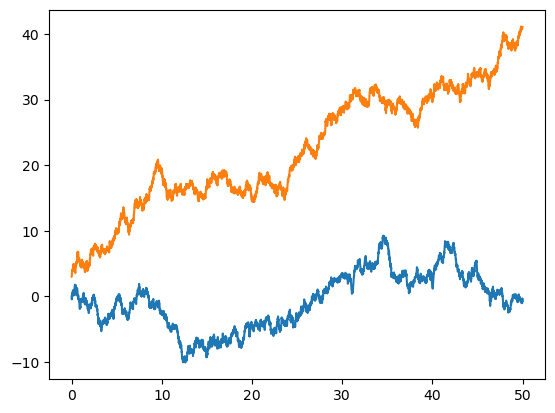

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x77dcb54e4b30>

In [107]:
fig, ax = subplots()
ax.plot(tt, trajs[1])
ax.plot(tt, trajs[2])
#ax.plot(tt, mod1.(trajs[1], params_1d.L))
#ax.plot(tt, mod1.(trajs[2], params_1d.L))

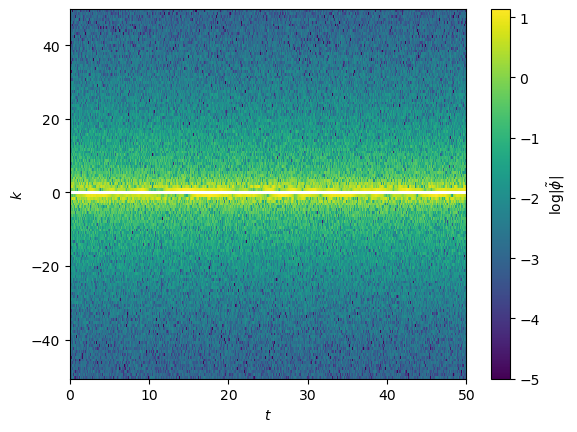

PyObject Text(25.000000000000007, 0.5, '$k$')

In [103]:
fig, ax = subplots()
p = ax.pcolormesh(tt, fftshift(kk), fftshift(log10.(abs.(phif_sol)), 1),
                  vmin=-5, cmap="viridis")
fig.colorbar(p, label=raw"$\log|\tilde\phi|$")
ax.set_xlabel(raw"$t$")
ax.set_ylabel(raw"$k$")

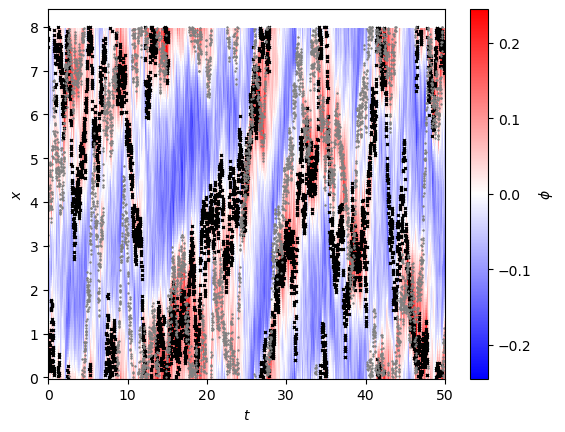

PyObject Text(24.000000000000007, 0.5, '$x$')

In [104]:
fig, ax = subplots()
vm = 0.75 * maximum(abs.(phi_sol))
p = ax.pcolormesh(tt, xx, phi_sol, vmin=-vm, vmax=vm, cmap="bwr")
ax.plot(tt, mod1.(trajs[1], params_1d.L), "x", color="0.", ms=2)
ax.plot(tt, mod1.(trajs[2], params_1d.L), "+", color="0.5", ms=2)
fig.colorbar(p, label=raw"$\phi$")
ax.set_xlabel(raw"$t$")
ax.set_ylabel(raw"$x$")

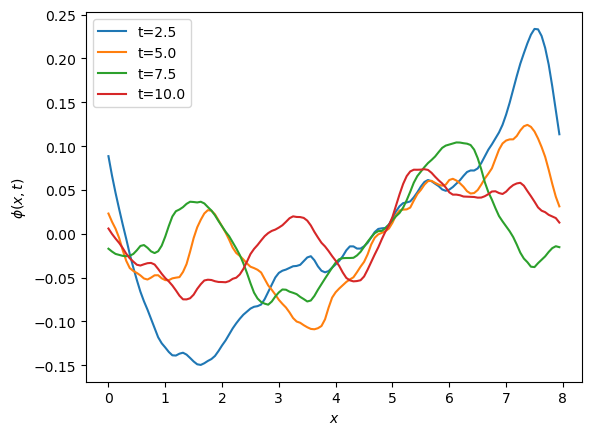

PyObject <matplotlib.legend.Legend object at 0x77dcb5ed5b20>

In [105]:
fig, ax = subplots()
for i in [251, 501, 751, 1001]
    ax.plot(xx, phi_sol[:, i], label="t=$(tt[i])")
end
ax.set_xlabel(raw"$x$")
ax.set_ylabel(raw"$\phi(x, t)$")
ax.legend()

In [102]:
sum(phi_sol[:, end])

-4.440892098500626e-16

# Tests

In [108]:
A = rand(3,2)

3×2 Matrix{Float64}:
 0.505374  0.289274
 0.684573  0.218482
 0.706548  0.508641

In [112]:
for i in CartesianIndices(A)
  println(i[1], " ", i[2])
end

1 1
2 1
3 1
1 2
2 2
3 2


In [127]:
function outer_fun(fun, xxs)
    res = zeros((length(xx) for xx in xxs)...)
    for i in CartesianIndices(res)
        res[i] = fun((xx[i[k]] for (k, xx) in enumerate(xxs))...)
    end
    return res
end

outer_fun (generic function with 1 method)

In [128]:
fun(x, y) = x + y
outer_fun(fun, ([1., 2.], [3., 4., 5]))

2×3 Matrix{Float64}:
 4.0  5.0  6.0
 5.0  6.0  7.0

In [206]:
s = (8, 6)
qx = fftfreq(s[1])
qy = fftfreq(s[2])

arr = zeros(s)

for j = 1:(s[2]÷2+1), i = 1:(s[1]÷2+1)
    i2 = ((i == 1) || (i == s[1]÷2+1)) ? i : s[1] + 2 - i
    j2 = ((j == 1) || (j == s[2]÷2+1)) ? j : s[2] + 2 - j
    arr[i, j] = 1.
    arr[i2, j2] = 1.
    #println("(", i, ", ", j, ") (", i2, ", ", j2, ")")
    #println("  (", qx[i], ", ", qy[j], ") (", qx[i2], ", ", qy[j2], ")")
end
for j = 2:(s[2]÷2), i=(s[1]÷2+2):s[1]
    i2 = s[1] + 2 - i
    j2 = s[2] + 2 - j
end

In [207]:
arr

8×6 Matrix{Float64}:
 1.0   1.0   1.0  1.0   1.0   1.0
 1.0   1.0   1.0  1.0  -1.0  -1.0
 1.0   1.0   1.0  1.0  -1.0  -1.0
 1.0   1.0   1.0  1.0  -1.0  -1.0
 1.0   1.0   1.0  1.0   1.0   1.0
 1.0  -1.0  -1.0  1.0   1.0   1.0
 1.0  -1.0  -1.0  1.0   1.0   1.0
 1.0  -1.0  -1.0  1.0   1.0   1.0

# 2D

In [137]:
include("gaussian_field.jl")

run_and_save2 (generic function with 1 method)

In [159]:
params_2d = (
    Lx=2.,
    Ly=1.,
    nx=32, # Should be even
    ny=16, # Should be even
    tmax=1.,
    D=1.,
    r=1.,
    T=1.,
    k=0., # No confining potential
    A=1.,
    σ=0.25,
    saveat=0.0005,
    m=3,
    X0=[[0., 0.] [0.5, 0.5] [0.75, 0.75]]
)

(Lx = 2.0, Ly = 1.0, nx = 32, ny = 16, tmax = 1.0, D = 1.0, r = 1.0, T = 1.0, k = 0.0, A = 1.0, σ = 0.25, saveat = 0.0005, m = 3, X0 = [0.0 0.5 0.75; 0.0 0.5 0.75])

In [160]:
xx, kkx = fourier_xk(params_2d.Lx, params_2d.nx)
yy, kky = fourier_xk(params_2d.Ly, params_2d.ny)

([0.0, 0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5, 0.5625, 0.625, 0.6875, 0.75, 0.8125, 0.875, 0.9375], [0.0, 6.283185307179586, 12.566370614359172, 18.84955592153876, 25.132741228718345, 31.41592653589793, 37.69911184307752, 43.982297150257104, -50.26548245743669, -43.982297150257104, -37.69911184307752, -31.41592653589793, -25.132741228718345, -18.84955592153876, -12.566370614359172, -6.283185307179586])

In [161]:
#@time sol2 = run2(params_2d);

In [162]:
#save2("data/test.h5", sol2, params_2d);

In [163]:
@time sol2 = run_and_save2(params_2d, "data/test.h5");

  8.501316 seconds (5.45 M allocations: 7.750 GiB, 10.19% gc time)


In [149]:
skip = 1
tt = sol2.t[1:skip:end]
trajs = [
    [s[params_2d.nx*params_2d.ny+2*k-1:params_2d.nx*params_2d.ny+2*k]
        for s in sol2.u[1:skip:end]] 
    for k=1:params_2d.m
];
phif_sol = [
    reshape(s[1:end-2*params_2d.m], (params_2d.nx, params_2d.ny))
    for s in sol2.u[1:skip:end]
    ]
println(size(phif_sol))
phi_sol = [
    custom_irfft2(
        reshape(s[1:end-2*params_2d.m], (params_2d.nx, params_2d.ny))
    )
    for s in sol2.u[1:skip:end]
    ]
println(size(phi_sol))

(201,)
(201,)


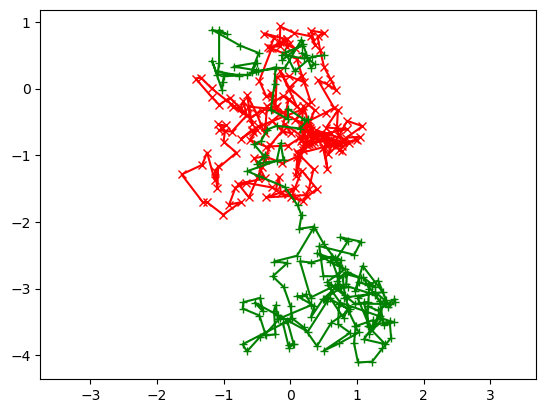

(-1.7925145481405897, 1.7275398293302164, -4.361129610547249, 1.1847540762411797)

In [150]:
fig, ax = plt.subplots()
ax.plot([a[1] for a in trajs[1]], [a[2] for a in trajs[1]], "rx-")
ax.plot([a[1] for a in trajs[2]], [a[2] for a in trajs[2]], "g+-")
ax.axis("equal")

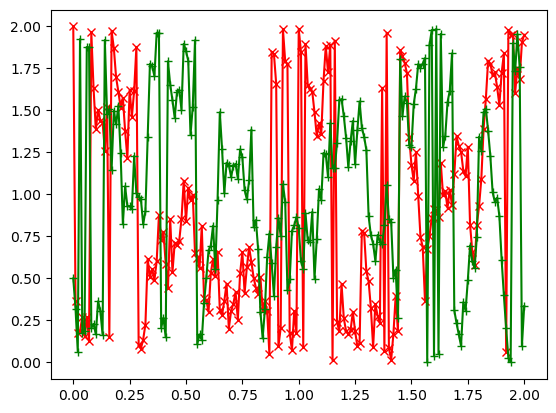

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7adfc9f914c0>

In [151]:
fig, ax = plt.subplots()
ax.plot(tt, mod1.([a[1] for a in trajs[1]], params_2d.Lx), "rx-")
ax.plot(tt,  mod1.([a[1] for a in trajs[2]], params_2d.Lx), "g+-")

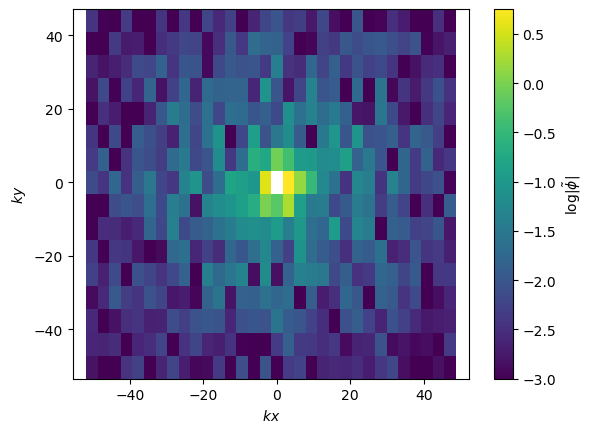

(-51.83627878423159, 48.694686130641784, -53.40707511102649, 47.12388980384689)

In [152]:
fig, ax = subplots()
p = ax.pcolormesh(fftshift(kkx), fftshift(kky), 
                  transpose(fftshift(log10.(abs.(phif_sol[end])))),
                  vmin=-3, cmap="viridis")
fig.colorbar(p, label=raw"$\log|\tilde\phi|$")
ax.set_xlabel(raw"$kx$")
ax.set_ylabel(raw"$ky$")
ax.axis("equal")

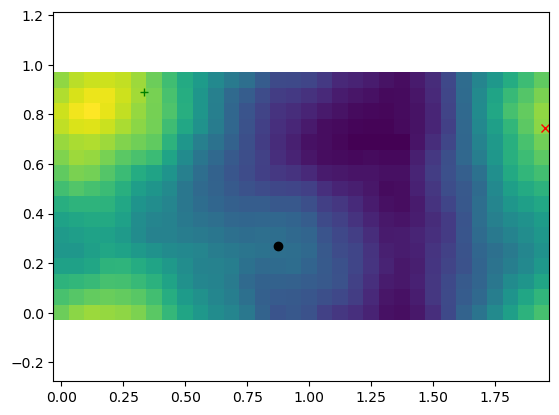

(-0.03125, 1.96875, -0.03125, 0.96875)

In [153]:
n = 201
fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, transpose(phi_sol[n]))
ax.plot(mod1(trajs[1][n][1], params_2d.Lx), mod1(trajs[1][n][2], params_2d.Ly), "rx")
ax.plot(mod1(trajs[2][n][1], params_2d.Lx), mod1(trajs[2][n][2], params_2d.Ly), "g+")
ax.plot(mod1(trajs[3][n][1], params_2d.Lx), mod1(trajs[3][n][2], params_2d.Ly), "ko")
ax.axis("equal")

In [125]:
XXf = cat(
    [reshape(s[params_2d.nx*params_2d.ny+1:end], (2, params_2d.m))
            for s in sol2.u]...,
    dims=3
);

uuuf = cat(
    [fftshift(reshape(s[1:params_2d.nx*params_2d.ny],
        (params_2d.nx, params_2d.ny)))
            for s in sol2.u]...,
    dims=3
);

uuur = cat(
        [custom_irfft2(
            reshape(s[1:params_2d.nx*params_2d.ny],
            (params_2d.nx, params_2d.ny)))
            for s in sol2.u]...,
    dims=3
);

In [126]:
size(XXf), size(uuuf), size(uuur)

((2, 3, 201), (32, 32, 201), (32, 32, 201))

In [107]:
XXf[:, 3, 1]

2-element Vector{Float64}:
 1.0
 1.0

In [65]:
for (k,v) in zip(keys(params_2d), params_2d)
    println(k, " => ", v)
end

Lx => 2.0
Ly => 2.0
nx => 32
ny => 32
tmax => 2.0
D => 1.0
r => 1.0
T => 1.0
k => 0.0
A => 1.0
σ => 0.25
saveat => 0.01
m => 2
X0 => [0.0 0.0; 1.0 1.0]


In [129]:
h5open("data/test.h5", "w") do fid
    for (k,v) in zip(keys(params_2d), params_2d)
        attributes(fid)[String(k)] = v
    end
    fid["t"] = sol2.t
    fid["x"] = xx
    fid["y"] = yy
    fid["kx"] = fftshift(kkx)
    fid["ky"] = fftshift(kky)
    fid["X"] = XXf
    fid["u"] = uuur
    fid["uf"] = uuuf
end;

In [102]:
reshape(reduce(hcat, [s[1:end-2*params_2d.m] for s in sol2.u]),
        (params_2d.nx, params_2d.ny, length(sol2.u)))

32×32×201 Array{Float64, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.

In [18]:
X0=[[0., 0.] [1., 1.] [2., 2.]]

2×3 Matrix{Float64}:
 0.0  1.0  2.0
 0.0  1.0  2.0

In [21]:
reshape(reshape(X0, 6), (2, 3))

2×3 Matrix{Float64}:
 0.0  1.0  2.0
 0.0  1.0  2.0

In [22]:
X0[1,:]

3-element Vector{Float64}:
 0.0
 1.0
 2.0